## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Exploring Data

In [4]:
# Import training set
df = pd.read_csv("train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

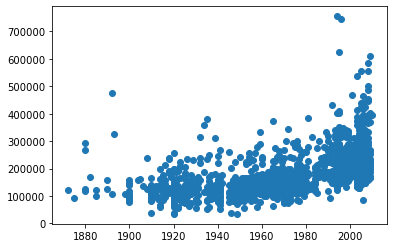

In [15]:
fig, ax = plt.subplots()
ax.scatter(df['YearBuilt'], df['SalePrice'])

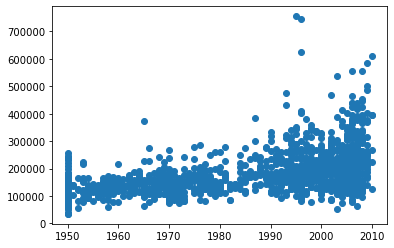

In [18]:
fig, ax = plt.subplots()
ax.scatter(df['YearRemodAdd'], df['SalePrice'])

<AxesSubplot:ylabel='Frequency'>

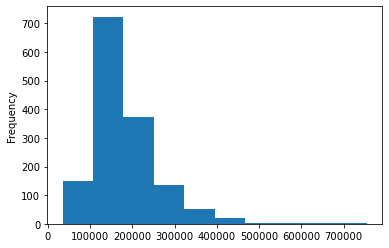

In [9]:
df.SalePrice.plot.hist()

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
# Sorting DataFrame by YearBuilt
df.sort_values(by=["YearRemodAdd"], inplace=True, ascending=True)
df.YearRemodAdd.head(20)

296     1950
646     1950
1150    1950
74      1950
844     1950
459     1950
985     1950
1090    1950
1235    1950
565     1950
620     1950
883     1950
1132    1950
1416    1950
711     1950
242     1950
390     1950
1062    1950
456     1950
98      1950
Name: YearRemodAdd, dtype: int64

In [28]:
df.YearRemodAdd.tail(20)

1451    2009
803     2009
515     2009
644     2009
1165    2009
460     2009
914     2009
103     2009
507     2009
412     2009
1217    2009
211     2009
87      2009
212     2009
157     2010
987     2010
819     2010
855     2010
898     2010
378     2010
Name: YearRemodAdd, dtype: int64

### Make a copy of the original DataFrame

In [29]:
df_temp = df.copy()

In [40]:
df_temp["OverallCond"].sort_values(ascending=False).value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [41]:
len(df_temp)

1460

## 5. Modeling

In [42]:
# Building a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

ValueError: could not convert string to float: 'RM'

In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 296 to 378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overall

In [45]:
df_temp.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Convert string to categories
Turn all of the data into numbers by converting them into pandas categories.

Machine learning is basically getting some data, and then preparing/manipulating it to run with an existing machine learning model that I've chosen so that the model can find the patterns/predictions.

And then evaluating how well it worked is what I'm doing here

In [46]:
pd.api.types.is_string_dtype(df_temp["MSZoning"])

True

In [49]:
# Find the columns which contain strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [50]:
# This will turn  all of the string values into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [51]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 296 to 378
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   i

In [52]:
df_temp.MSZoning.cat.categories

Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')

In [54]:
df_temp.MSZoning.cat.codes

296     4
646     3
1150    3
74      4
844     4
       ..
987     3
819     3
855     3
898     3
378     3
Length: 1460, dtype: int8

Pandas Categories enable us to access all of our data in the form of numbers.

Now, it's time to fill missing numerical values

In [2]:
# In case I'd have to start over, I can come here and then import the csv file I preprocessed before
# But for some reason, dtype in the non-numerical columns still remains as object
# So I'm using the for loop to change them back to categorical values
# Check the dataframe with df_temp.info() before proceeding

df_temp = pd.read_csv("train_temp.csv")

for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [3]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

## Fill missing values

### Fill missing numerical values first

In [4]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [5]:
# check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [6]:
# Fill numeric rows with the median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing
            df_temp[label+"_is_missing"] = pd.isnull(content)
            # fill missing numeric values with median
            df_temp[label] = content.fillna(content.median())

In [7]:
# Check if there's any null numeric values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [8]:
# check to see how many examples were missing
# LotFrontage had about 259 null values before filling
df_temp.LotFrontage_is_missing.value_counts()

False    1201
True      259
Name: LotFrontage_is_missing, dtype: int64

In [9]:
pd.set_option('display.max_rows',None)

In [10]:
df_temp.isna().sum()

Id                           0
MSSubClass                   0
MSZoning                     0
LotFrontage                  0
LotArea                      0
Street                       0
Alley                     1369
LotShape                     0
LandContour                  0
Utilities                    0
LotConfig                    0
LandSlope                    0
Neighborhood                 0
Condition1                   0
Condition2                   0
BldgType                     0
HouseStyle                   0
OverallQual                  0
OverallCond                  0
YearBuilt                    0
YearRemodAdd                 0
RoofStyle                    0
RoofMatl                     0
Exterior1st                  0
Exterior2nd                  0
MasVnrType                   8
MasVnrArea                   0
ExterQual                    0
ExterCond                    0
Foundation                   0
BsmtQual                    37
BsmtCond                    37
BsmtExpo

### Filling and turning categorical variables into numbers

In [11]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [12]:
# Turn categorical variables into numbers and fill missing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether sample had missing value
        df_temp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes + 1

In [13]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


In [14]:
df_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,297,50,5,75.0,13710,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,647,20,4,60.0,7200,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,1151,20,4,57.0,8280,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,75,50,5,60.0,5790,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
4,845,50,5,100.0,12665,2,1,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [15]:
df_temp.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandContour                 0
Utilities                   0
LotConfig                   0
LandSlope                   0
Neighborhood                0
Condition1                  0
Condition2                  0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
RoofStyle                   0
RoofMatl                    0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinTyp

Now that all of data is numeric as well as our dataframe has no missing values, build a machine learning model

In [16]:
len(df_temp)

1460

In [17]:
%%time
# Instantiate model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

CPU times: user 2.02 s, sys: 154 ms, total: 2.18 s
Wall time: 2.29 s


RandomForestRegressor(random_state=42)

In [18]:
# Score the model
model.score(df_temp.drop("SalePrice", axis=1), df_temp["SalePrice"])

0.9789607741449295

**Question:** Why isn't the metric reliable? 

### Splitting data into train and validation sets

In [19]:
df_temp.YrSold

0       2007
1       2008
2       2007
3       2010
4       2008
5       2009
6       2008
7       2009
8       2006
9       2010
10      2008
11      2006
12      2007
13      2010
14      2010
15      2006
16      2008
17      2007
18      2008
19      2010
20      2006
21      2010
22      2006
23      2009
24      2009
25      2009
26      2009
27      2006
28      2009
29      2008
30      2006
31      2009
32      2007
33      2007
34      2010
35      2007
36      2010
37      2009
38      2009
39      2006
40      2006
41      2008
42      2006
43      2008
44      2008
45      2006
46      2006
47      2008
48      2006
49      2009
50      2009
51      2008
52      2006
53      2009
54      2007
55      2007
56      2007
57      2006
58      2007
59      2007
60      2007
61      2007
62      2008
63      2008
64      2009
65      2010
66      2006
67      2006
68      2007
69      2008
70      2009
71      2009
72      2006
73      2010
74      2007
75      2007
76      2010

In [20]:
df_temp.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [21]:
df_val = df_temp[df_temp.YrSold == 2010]
df_train = df_temp[df_temp.YrSold != 2010]

len(df_val), len(df_train)

(175, 1285)

In [22]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1285, 126), (1285,), (175, 126), (175,))

In [23]:
y_train

0       152000
1        98300
2       124000
4       153900
5       110000
6       125000
7        92900
8       138887
10       67000
11      118500
12      117500
15       79000
16      119000
17       90000
18       98000
20      105000
22       93500
23       76000
24      145000
25      177000
26       82500
27      149000
28       82500
29      120000
30      230000
31      108000
32       87000
33      139400
35       87000
37      141500
38       78000
39      120000
40      109500
41      119000
42       87000
43       68500
44       85000
45      137000
46       87500
47      115000
48      135000
49      121000
50       82000
51      185000
52      116000
53      133000
54       86000
55      239000
56      145000
57       35311
58      119000
59      180500
60      143000
61       67000
62       72500
63      129500
64       90000
66       91500
67      116000
68      122000
69      130000
70      104000
71       37900
72      144000
74      136000
75      119200
77       6

## Building an evaluation function

In [26]:
# Create evaluation function (the competition uses RMSE)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse(y_test, y_preds):
    """
    Calculates root mean squared error between predictions and test labels.
    """
    return np.sqrt(mean_squared_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": rmse(y_train, train_preds),
              "Valid RMSE": rmse(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}

    return scores

## Testing the model on a subset (to tune the hyperparameters)